In [3]:
import os
print(os.getcwd())

/Users/fourrcerise/project


In [4]:
os.chdir("/Users/fourrcerise/Downloads/PANDAS")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv("fct_invoice.csv")
customers = pd.read_json("dim_customer.json")

In [7]:
print(customers.columns)

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [8]:
customers.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [ ]:
# Easy Question 1: How many unique customers are in the dataset?

In [17]:
unique_customers = customers['id'].nunique()
print(f"Unique customers: {unique_customers}")

Unique customers: 5191


In [ ]:
# Easy Question 2: What are the different categories of products available? How many unique categories are there?

In [16]:
unique_categories = invoices['category'].unique()
num_categories = invoices['category'].nunique()
print(f"Categories: {unique_categories}")
print(f"Number of unique categories: {num_categories}")

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


In [ ]:
# Easy Question 3: Which payment method is the most popular? How many times was it used?

In [15]:
most_common_payment = invoices['payment_method'].value_counts().idxmax()
usage_count = invoices['payment_method'].value_counts().max()
print(f"Most popular payment method: {most_common_payment}, used {usage_count} times")

Most popular payment method: Cash, used 44447 times


In [ ]:
# Medium Question 1: What are the three most popular categories, by total sales?

In [14]:
popular_categories = invoices.groupby('category')['price'].sum().sort_values(ascending=False).head(3)
print(popular_categories)

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64


In [ ]:
# Medium Question 2: What are the total sales attributed to customers over the age of 45?

In [21]:
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
sales_over_45 = merged[merged['age'] > 45]['price'].sum()
print(f"Total sales to customers over 45: {sales_over_45}")

Total sales to customers over 45: 22370553.269999996


In [ ]:
# Medium Question 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

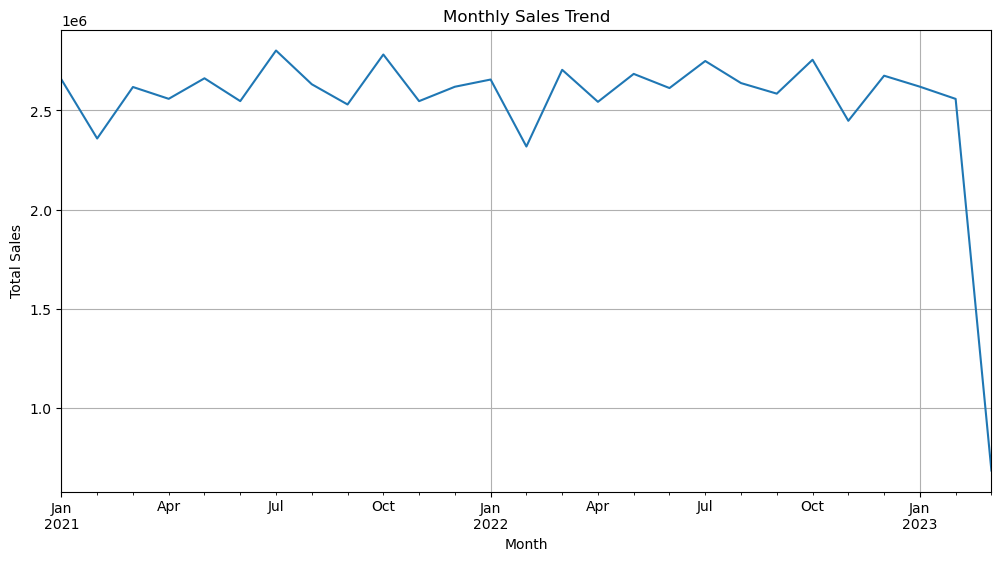

In [24]:
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)

daily_sales = invoices.groupby(invoices['invoice_date'].dt.to_period('M'))['price'].sum()

daily_sales.plot(kind='line', title="Monthly Sales Trend", figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [ ]:
# Hard Question: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range.

In [33]:
def age_to_range(age):
    if pd.isna(age):
        return 'Unknown'
    if age < 10:
        return '<10'
    lower = (age // 10) * 10
    upper = lower + 9
    return f"{int(lower)}-{int(upper)}"

merged['age_group'] = merged['age'].apply(age_to_range)

pivot = pd.pivot_table(
    merged,
    index='category',
    columns='age_group',
    values='price',
    aggfunc='sum',
    fill_value=0
)
pivot

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Unknown
category,,,,,,,,,
Books,3469.35,21619.05,22997.70,23361.30,20664.60,21513.00,15437.85,7575.00,90339.45
Clothing,518238.16,2818351.36,3074919.76,3066817.60,2803647.44,2910776.00,2117064.40,1228827.60,12537042.32
Cosmetics,29681.80,165079.60,198054.86,181343.60,160932.28,176627.04,114132.62,71236.32,751518.78
Food & Beverage,3645.31,20428.38,23744.20,24460.71,19999.52,22190.89,14968.26,8561.51,93569.93
Shoes,274277.69,1630061.72,1912141.62,1889335.16,1591650.84,1618058.32,1210542.89,708200.60,7301068.05
Souvenir,3296.13,15295.92,17548.08,17759.22,15084.78,15331.11,10592.19,6545.34,72984.06
Technology,287700.00,1426950.00,1669500.00,1630650.00,1220100.00,1529850.00,977550.00,548100.00,6481650.00
Toys,17203.20,102466.56,115297.28,106910.72,94115.84,100244.48,74475.52,43043.84,432947.20
